In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv") #Gathering data in form of dataframe

In [55]:
#accessing data
df.head() #first 5 entires
print("No. of rows", df.shape[0]) #no. of rows
print("No. of columns", df.shape[1])#no. columns
df.columns #column entires
df.info() #gives a concise summary of dataframe

No. of rows 891
No. of columns 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
status      891 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [16]:
#Data cleaning
#From initial look on the dataset and the question in mind, 
#It is sure that columns named PassengerId, Name, Ticket will not contribute to our analysis, 
#thus, we should drop those columns
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [25]:
#handling missing values
df['Age'].describe() #summary of column age
df["Age"].isna().sum() #counting thr number of missing values
#Age columns has a large standard deviation from the mean value. 
#That means it's not possible to simply fill the missing values as the mean value.

177

In [28]:
#filling missing values by  
#generating a list of random numbers equal to the length of missing values between (mean-std) and (mean+std)
#used in cases where there is huge dufference between mean and std
import random
print('Number of Missing values in Age:',df['Age'].isnull().sum())

mean = df['Age'].mean()
std = df['Age'].std()
lower_limit = round(mean-std,0)
upper_limit = round(mean+std,0)
random_list=[]
for i in range(0,177):
    random_list.append(random.randint(lower_limit,upper_limit))

random_list=np.array(random_list)

age=df['Age'].values

k=0
for i,j in enumerate(age):
    if np.isnan(age[i]):
        age[i]=random_list[k]
        k+=1

df['Age']=age

print('Number of missing values in age: ',df['Age'].isnull().sum())

Number of Missing values in Age: 177
Number of missing values in age:  0


In [31]:
#columns with too many missing values should be dropped
print(df['Cabin'].describe())
print('Number of missing values in Cabin column: ',df['Cabin'].isnull().sum()) #this column has too many missing values so remove it.
df.drop(columns=["cabin"],inplace=True)
df.head()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object
Number of missing values in Cabin column:  687


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [35]:
#with very less missing values it should be replaced with the most the most common value(top). 
print(df['Embarked'].describe())
print('Missing values: ',df['Embarked'].isnull().sum())
df['Embarked'].fillna('S',inplace=True)

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object
Missing values:  0


In [48]:
#once we are done with cleaning,lets start with exploring
print(df["Pclass"].dtypes) #pclass should be a string value 
df["Pclass"] = df["Pclass"].astype(object)
df['Pclass'].replace({1:'Upper Class',2:'Middle Class',3:'Lower Class'},inplace=True)


object


In [52]:
#Adding a new column 'status' to store survived status as a string for better visualisations
df['status']=''
df.loc[(df['Survived']==1),'status'] = 'Survived'
df.loc[(df['Survived']==0),'status'] = 'Not Survived'
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,status
0,0,Lower Class,male,22.0,1,0,7.2500,NaN,S,Not Survived
1,1,Upper Class,female,38.0,1,0,71.2833,C85,C,Survived
2,1,Lower Class,female,26.0,0,0,7.9250,NaN,S,Survived
3,1,Upper Class,female,35.0,1,0,53.1000,C123,S,Survived
4,0,Lower Class,male,35.0,0,0,8.0500,NaN,S,Not Survived


In [57]:
# Seeing the correlation in the data
print(df.corr())

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.069928 -0.035322  0.081629  0.257307
Age      -0.069928  1.000000 -0.233593 -0.172807  0.081574
SibSp    -0.035322 -0.233593  1.000000  0.414838  0.159651
Parch     0.081629 -0.172807  0.414838  1.000000  0.216225
Fare      0.257307  0.081574  0.159651  0.216225  1.000000


In [59]:
#Number of people on the basis of gender, and class onboard the titanic
print(df.groupby('Sex')['Survived'].count())
print('\n\n',df.groupby('Pclass')['Survived'].count())

Sex
female    314
male      577
Name: Survived, dtype: int64


 Pclass
Lower Class     491
Middle Class    184
Upper Class     216
Name: Survived, dtype: int64


In [61]:
# Total number of people who survived the titanic in train.csv dataset
df.groupby("status").size()
# 0 = Not Survived
# 1 = Surived

status
Not Survived    549
Survived        342
dtype: int64

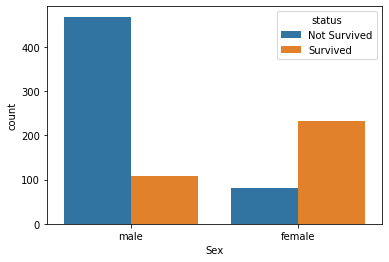

In [63]:
sns.countplot(x='Sex',hue='status',data=df) #female have survived more compared to male

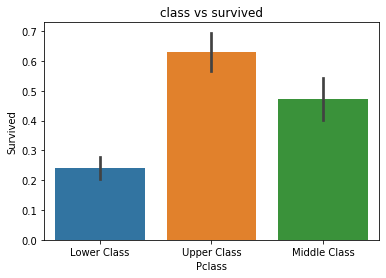

In [64]:
# Now, lets try to find out whether class of a person contributed to its likelihood of survival, 
# here class 1 indicates people belonging to upper class of society, class 2 is middle class, and class 3 is lower class.
sns.barplot(x="Pclass",y="Survived",data=df)
plt.title("class vs survived")
plt.show()
#people from upper class survived more then lower and middle class

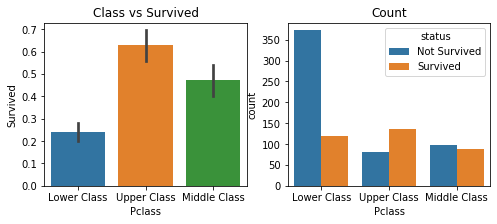

In [65]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Class vs Survived')
plt.subplot(1,2,2)
sns.countplot(x='Pclass',hue='status',data=df)
plt.title('Count')
plt.show()

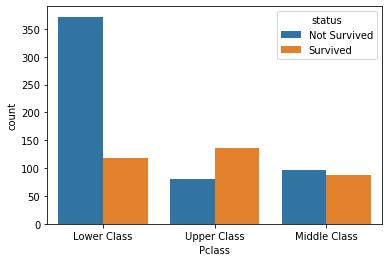

In [67]:
sns.countplot(x="Pclass",hue="status",data=df)

In [70]:
#exact no. of people who survived
print(df.groupby(['status','Pclass']).size())
print('\n\n',df.groupby(['Sex','Pclass','status']).size())

status        Pclass      
Not Survived  Lower Class     372
              Middle Class     97
              Upper Class      80
Survived      Lower Class     119
              Middle Class     87
              Upper Class     136
dtype: int64


 Sex     Pclass        status      
female  Lower Class   Not Survived     72
                      Survived         72
        Middle Class  Not Survived      6
                      Survived         70
        Upper Class   Not Survived      3
                      Survived         91
male    Lower Class   Not Survived    300
                      Survived         47
        Middle Class  Not Survived     91
                      Survived         17
        Upper Class   Not Survived     77
                      Survived         45
dtype: int64


In [ ]:
# Thus, from the above data, and the visualisation, we can infer that people belonging to 
# upper class were given more priority during the rescue operation.
#Females and children were given more priority compared to men